# Line plot, performance to target

# Document information

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Line plot, performance to target</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2091-01-25</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2019-01-24</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">line_plot_actual_vs_target.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">actual_vs_target.csv</td>
    </tr>
</table>

# Introduction

This notebook plots:

- Target value vs month of the year, as a line
- Actual value vs month of the year, as dots

In [1]:
import pandas as pd
import matplotlib.cm as cm
colour_1, colour_2, colour_3, colour_4, *_ = cm.Paired.colors
import matplotlib.axes as axes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def despine(ax: axes.Axes) -> None:
    'Remove the top and right spines of a graph'
    for spine in 'right', 'top':
        ax.spines[spine].set_color('none')

In [3]:
df = pd.read_csv('actual_vs_target.csv')

In [4]:
df.head()

,Date,Target,Actual
0,2019-01-31,10000,10000.0
1,2019-02-28,11500,NaN
2,2019-03-31,13000,NaN
3,2019-04-30,14500,NaN
4,2019-05-31,16000,NaN


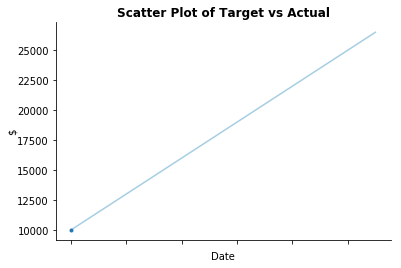

In [5]:
ax = df.plot.line(x='Date',
                  y='Target',
                  legend=False,
#                  style='.',
                  color=colour_1)
df.plot.line(x='Date',
             y='Actual',
             legend=False,
             style='.',
             color=colour_2,
             ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('$', labelpad=0)
ax.autoscale(enable=True)
ax.set_title('Scatter Plot of Target vs Actual',
             fontweight='bold')
despine(ax)

In [6]:
ax.figure.savefig('target_vs_actual.svg',
                  format='svg')